## Titanic Dataset Analysis

Import Modules(libraries)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Loading the dataset

In [5]:
data = pd.read_csv('/content/Titanic.csv.zip')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
 9   Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [12]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [13]:
data.shape

(418, 10)

In [14]:
print(data.isnull().sum())

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Survived        0
dtype: int64


In [15]:
data['Age'].isnull().sum()

86

In [16]:
print(data['Sex'].unique())

['male' 'female']


In [17]:
print(data.tail())

     PassengerId  Pclass                          Name     Sex   Age  SibSp  \
413         1305       3            Spector, Mr. Woolf    male   NaN      0   
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.5      0   
416         1308       3           Ware, Mr. Frederick    male   NaN      0   
417         1309       3      Peter, Master. Michael J    male   NaN      1   

     Parch      Fare Embarked  Survived  
413      0    8.0500        S         0  
414      0  108.9000        C         1  
415      0    7.2500        S         0  
416      0    8.0500        S         0  
417      1   22.3583        C         0  


In [18]:
survival_rate = data['Survived'].count()
print(survival_rate)

418


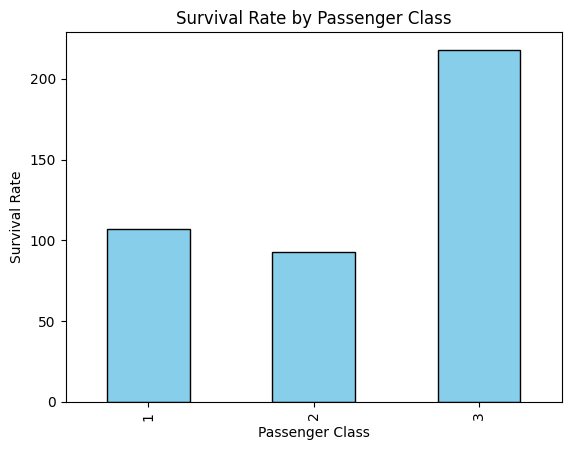

Pclass
1    107
2     93
3    218
Name: Survived, dtype: int64


In [19]:
survival_by_class = data.groupby('Pclass')['Survived'].count()
survival_by_class.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
print(survival_by_class)

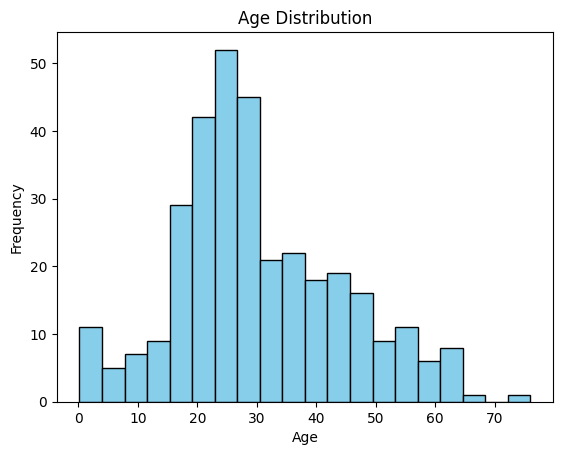

In [20]:
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

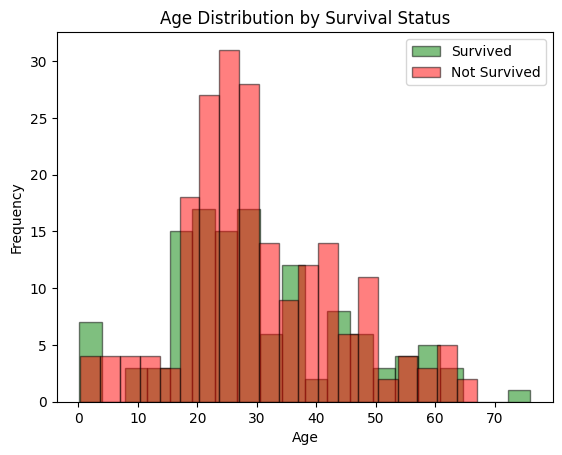

1      47.0
4      22.0
6      30.0
8      18.0
12     23.0
       ... 
402    22.0
409     3.0
411    37.0
412    28.0
414    39.0
Name: Age, Length: 127, dtype: float64


In [22]:
survived_age = data.loc[data['Survived'] == 1, 'Age'].dropna()
not_survived_age = data.loc[data['Survived'] == 0, 'Age'].dropna()

plt.hist(survived_age, bins=20, alpha=0.5, label='Survived', color='green', edgecolor='black')
plt.hist(not_survived_age, bins=20, alpha=0.5, label='Not Survived', color='red', edgecolor='black')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(survived_age)

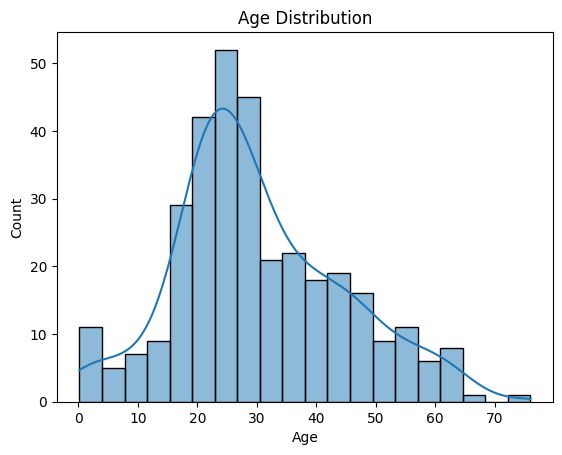

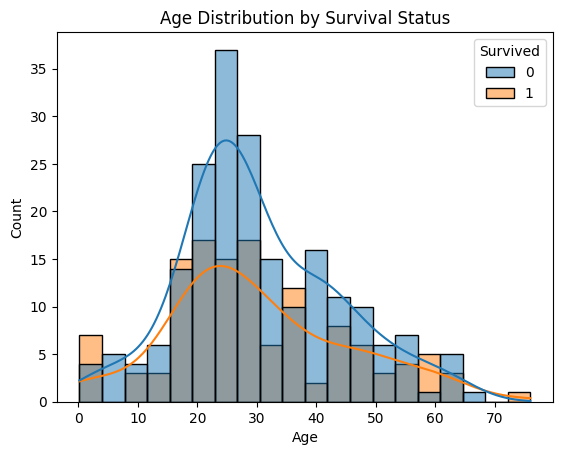

In [23]:
sns.histplot(data['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(x='Age', hue='Survived', data=data, bins=20, kde=True)
plt.title('Age Distribution by Survival Status')
plt.show()

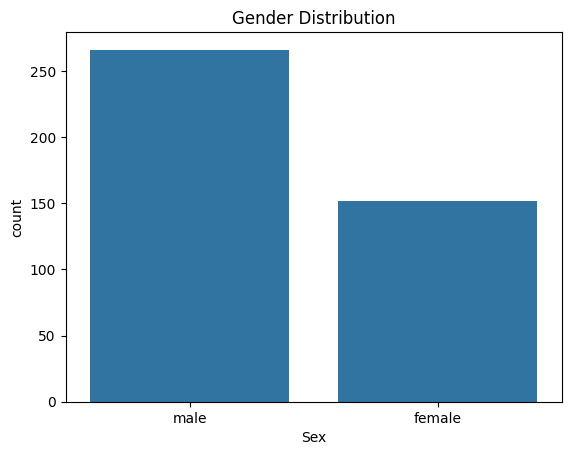

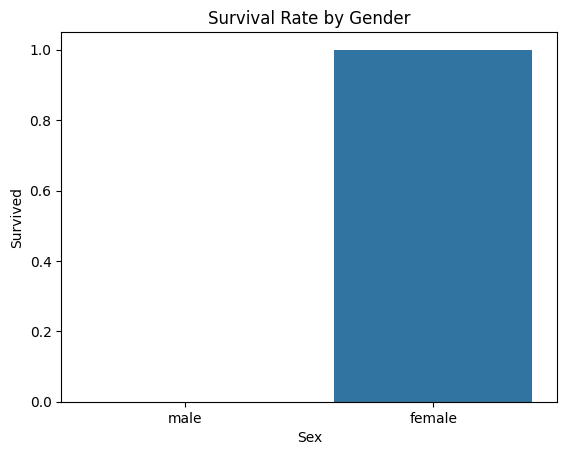

In [24]:
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution')
plt.show()

# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

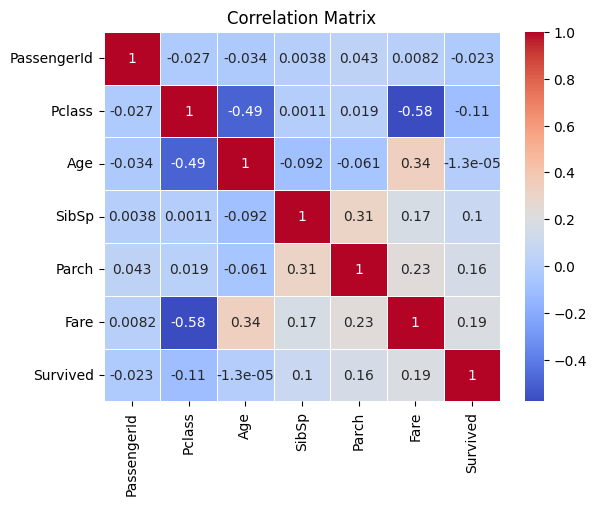

In [25]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Survived'}>, <Axes: >, <Axes: >]],
      dtype=object)

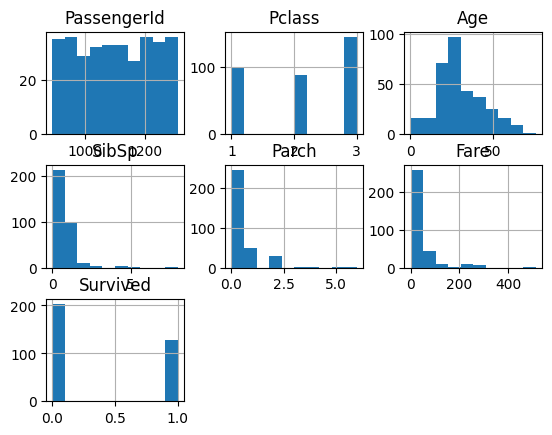

In [27]:
data.hist()

# end of my project #